* 问题1：我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？
* 问题2：对于这一组电影数据，如果我们想rating，runtime的分布情况，应该如何呈现数据？
* 问题3：对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* 问题1：我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？
* 问题2：对于这一组电影数据，如果我们想rating，runtime的分布情况，应该如何呈现数据？
* 问题3：对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

In [2]:
movies = pd.read_csv('IMDB/IMDB-Movie-Data.csv')
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## 问题1：我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？

In [4]:
movies.Rating.mean()

6.723199999999999

In [8]:
movies.Director.unique().size

644

## 问题2：对于这一组电影数据，如果我们想rating，runtime的分布情况，应该如何呈现数据？

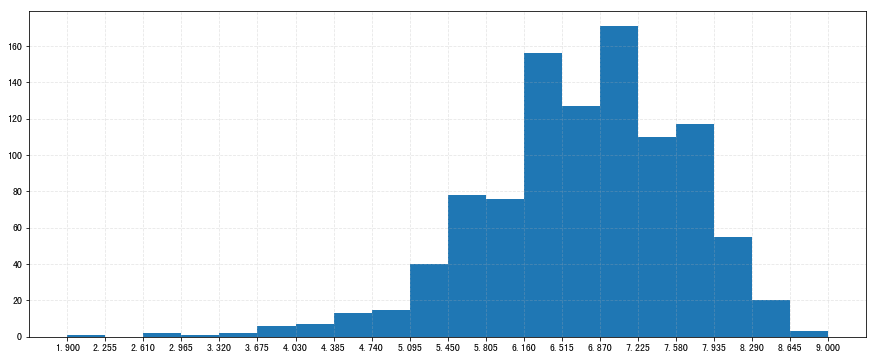

In [13]:
rating = movies.Rating

plt.figure(figsize=(15, 6))
plt.hist(rating.values, bins=20)

# 网格线
plt.grid(True, linestyle='--', alpha=0.3)

# 横轴刻度
ticks = np.linspace(rating.min(), rating.max(), 21)
plt.xticks(ticks)

plt.show()

## 问题3：对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

In [16]:
genre = movies.Genre
genre.head()

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
3     Animation,Comedy,Family
4    Action,Adventure,Fantasy
Name: Genre, dtype: object

In [17]:
# 提取出所有的电影类别名称
all_genre = set()
for line in genre:
    names = line.split(',')
    all_genre.update(names)

In [19]:
all_genre = sorted(all_genre)

In [21]:
len(all_genre)

20

In [23]:
# 创建一个1000x20的DataFrame，初始值为0
dummies = pd.DataFrame(np.zeros((1000, 20)), index=movies.index, columns=all_genre)
dummies.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# 合并原来的电影数据和dummies数据
movies = pd.concat([movies, dummies], axis=1)

In [30]:
movies.head(1)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# 便利每一步电影，根据电影的分类信息，在dummies部分标记上1
for line_idx in movies.index:
    movie = movies.iloc[line_idx]
    genre_names = movie.Genre.split(',')
    # movies.loc[0, ['Action', 'Adventure', 'Sci-Fi']]
    movies.loc[movies.index[line_idx], genre_names] = 1

In [32]:
movies.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
# 统计各个类别的情况
genre_data = movies.loc[:, all_genre]

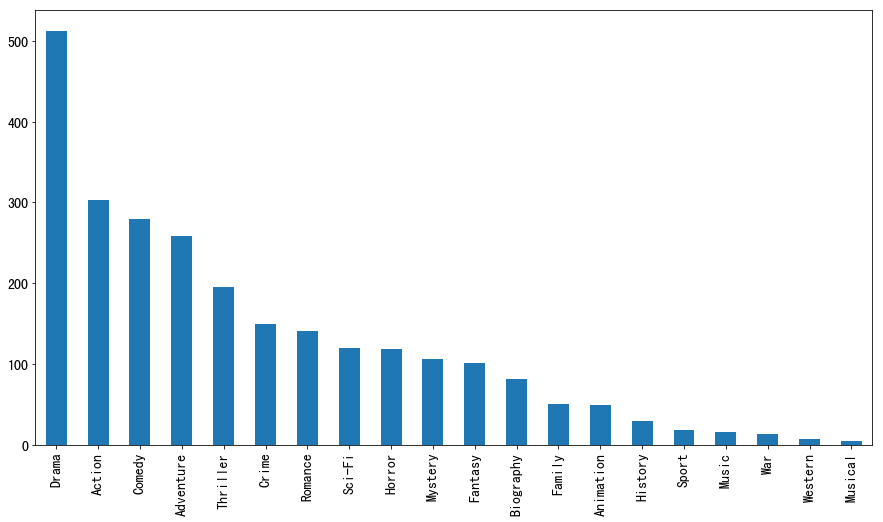

In [38]:
genre_data.sum(axis=0).sort_values(ascending=False).plot(kind='bar', fontsize=14, figsize=(15, 8))
plt.show()